# Image Dataset Processing Code

- Import and flatten the image dataset to 60K, 784
- Write the reshaped image dataset to csv for viewing the data set
- The csv contains 60K rows with 784 columns. Each row an image having 784 pixel values





(60000, 1, 28, 28)
(60000, 784)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Starting t-SNE embedding...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 60000 samples in 0.020s...


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computed neighbors for 60000 samples in 250.735s...
[t-SNE] Computed conditional probabilities for sample 1000 / 60000
[t-SNE] Computed conditional probabilities for sample 2000 / 60000
[t-SNE] Computed conditional probabilities for sample 3000 / 60000
[t-SNE] Computed conditional probabilities for sample 4000 / 60000
[t-SNE] Computed conditional probabilities for sample 5000 / 60000
[t-SNE] Computed conditional probabilities for sample 6000 / 60000
[t-SNE] Computed conditional probabilities for sample 7000 / 60000
[t-SNE] Computed conditional probabilities for sample 8000 / 60000
[t-SNE] Computed conditional probabilities for sample 9000 / 60000
[t-SNE] Computed conditional probabilities for sample 10000 / 60000
[t-SNE] Computed conditional probabilities for sample 11000 / 60000
[t-SNE] Computed conditional probabilities for sample 12000 / 60000
[t-SNE] Computed conditional probabilities for sample 13000 / 60000
[t-SNE] Computed conditional probabilities for sample 14000 / 600

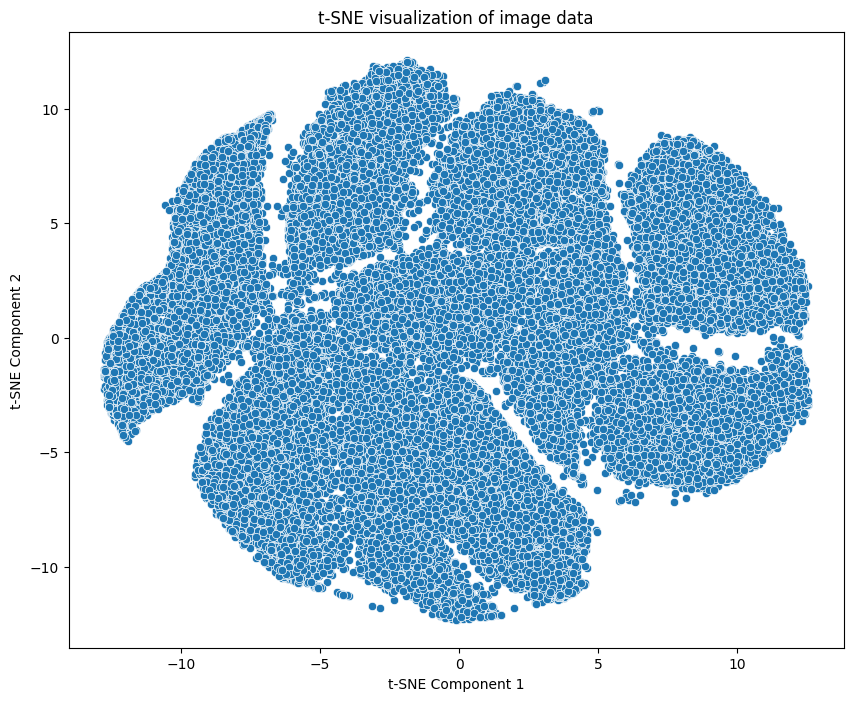

In [ ]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

X_train = np.load('/content/sample_data/unlabelled_train_data_images.npy')

# the data shape is
# this is a dataset of 60000 (60k) images each of size 28 pixels
# by 28 pixels (28 x 28) with only 1 channel (meaning grayscale image)
print(X_train.shape)

# trying to reshape
reshaped_X_train = X_train.reshape(X_train.shape[0], -1)
print(reshaped_X_train.shape)
print(reshaped_X_train)

# Normalize the dataset into [0,1] so to standardize the features values
# remove any bias towards features having higher value when doing PCA
reshaped_X_train = reshaped_X_train / 255.0

# Initialize t-SNE
# You can experiment with different parameters:
# - n_components: The dimension of the embedded space (usually 2 or 3)
# - perplexity: Related to the number of nearest neighbors used in manifold learning.
#               Typical values are between 5 and 50. Larger datasets often benefit
#               from higher perplexity.
# - n_iter: Maximum number of iterations for the optimization. Higher values
#           can lead to better embeddings but take longer.
# - random_state: For reproducibility.
tsne = TSNE(n_components=2, perplexity=30, max_iter=300, random_state=42, verbose=1)

print("Starting t-SNE embedding...")
# Fit and transform the data
X_embedded = tsne.fit_transform(reshaped_X_train)
print("t-SNE embedding finished.")

# Create a new dataframe for the embedded data
df_embedded = pd.DataFrame(X_embedded, columns=['tsne_1', 'tsne_2'])

# Now you can visualize the embedded data
plt.figure(figsize=(10, 8))
sns.scatterplot(x='tsne_1', y='tsne_2', hue='cluster', palette='viridis', data=df_embedded)
plt.title('t-SNE visualization of image data (colored by cluster)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

- We would also try the approach of viewing the clusters in 2D using t-SNE, with reducing the features by applying PCA first and then doing t-SNE on the reduced features

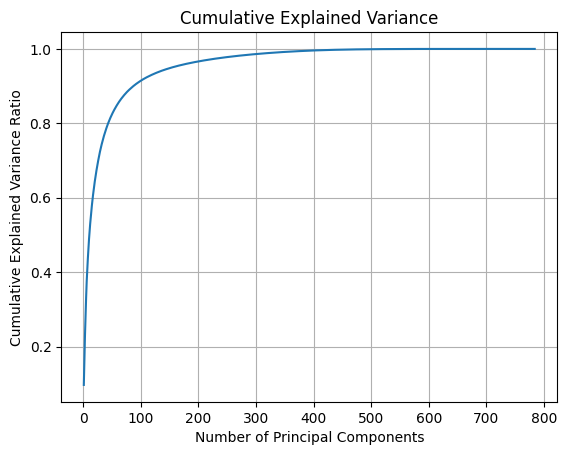

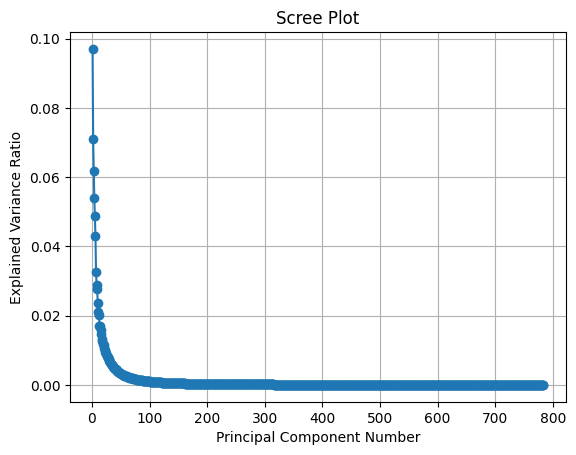

Number of components to retain 75% variance: 34
Starting t-SNE embedding on PCA reduced dataset...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 60000 samples in 0.002s...
[t-SNE] Computed neighbors for 60000 samples in 29.682s...
[t-SNE] Computed conditional probabilities for sample 1000 / 60000
[t-SNE] Computed conditional probabilities for sample 2000 / 60000
[t-SNE] Computed conditional probabilities for sample 3000 / 60000
[t-SNE] Computed conditional probabilities for sample 4000 / 60000
[t-SNE] Computed conditional probabilities for sample 5000 / 60000
[t-SNE] Computed conditional probabilities for sample 6000 / 60000
[t-SNE] Computed conditional probabilities for sample 7000 / 60000
[t-SNE] Computed conditional probabilities for sample 8000 / 60000
[t-SNE] Computed conditional probabilities for sample 9000 / 60000
[t-SNE] Computed conditional probabilities for sample 10000 / 60000
[t-SNE] Computed conditional probabilities for sample 11000 / 60000
[t-SNE] Computed c

<ipython-input-3-92d778f66d6a>:79: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='tsne_1', y='tsne_2', palette='viridis', data=df_embedded) # If you have labels, add 'hue='label''


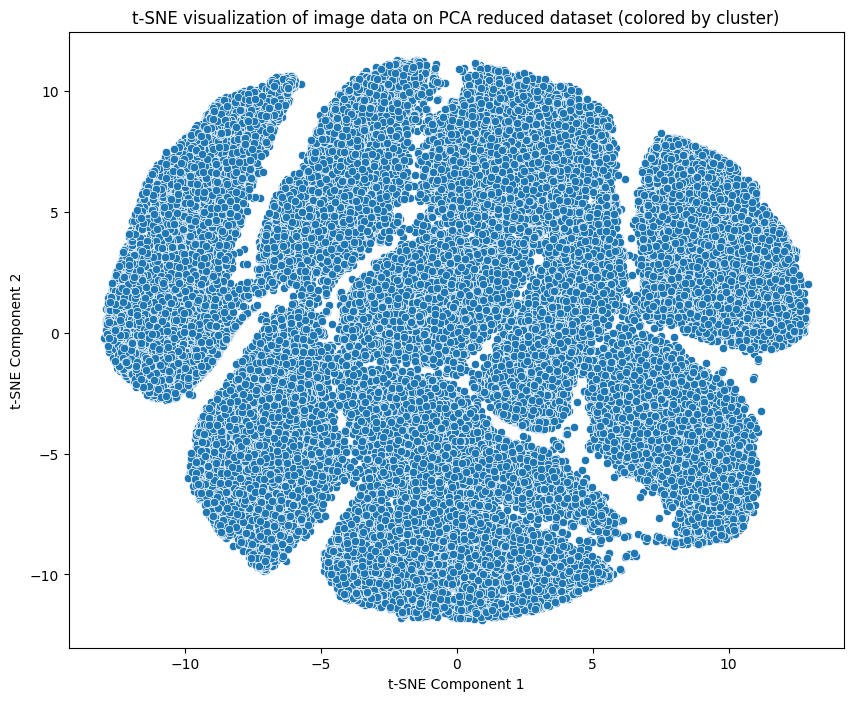

In [ ]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

X_train = np.load('/content/sample_data/unlabelled_train_data_images.npy')

# the data shape is
# this is a dataset of 60000 (60k) images each of size 28 pixels
# by 28 pixels (28 x 28) with only 1 channel (meaning grayscale image)
#print(X_train.shape)

# trying to reshape
reshaped_X_train = X_train.reshape(X_train.shape[0], -1)
#print(reshaped_X_train.shape)
#print(reshaped_X_train)

# Normalize the dataset into [0,1] so to standardize the features values
# remove any bias towards features having higher value when doing PCA
reshaped_X_train = reshaped_X_train / 255.0

# Initialize PCA
pca = PCA()
pca.fit(reshaped_X_train)

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance')
plt.grid(True)
plt.show()

plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Principal Component Number')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

# Choose the number of components to retain a certain percentage of variance
n_components = np.argmax(cumulative_variance_ratio >= 0.75) + 1 # For 75% variance
print(f"Number of components to retain 75% variance: {n_components}")

# You can then re-initialize PCA with the chosen number of components
pca_reduced = PCA(n_components=n_components)
X_reduced = pca_reduced.fit_transform(reshaped_X_train)

#print(f"Original data shape: {reshaped_X_train.shape}")
#print(f"Reduced data shape: {X_reduced.shape}")

# Initialize t-SNE
# You can experiment with different parameters:
# - n_components: The dimension of the embedded space (usually 2 or 3)
# - perplexity: Related to the number of nearest neighbors used in manifold learning.
#               Typical values are between 5 and 50. Larger datasets often benefit
#               from higher perplexity.
# - n_iter: Maximum number of iterations for the optimization. Higher values
#           can lead to better embeddings but take longer.
# - random_state: For reproducibility.
tsne = TSNE(n_components=2, perplexity=30, max_iter=300, random_state=42, verbose=1)

print("Starting t-SNE embedding on PCA reduced dataset...")
# Fit and transform the data
X_embedded = tsne.fit_transform(X_reduced)
print("t-SNE embedding finished on PCA reduced dataset.")

# Create a new dataframe for the embedded data
df_embedded = pd.DataFrame(X_embedded, columns=['tsne_1', 'tsne_2'])

# Now you can visualize the embedded data
plt.figure(figsize=(10, 8))
sns.scatterplot(x='tsne_1', y='tsne_2', palette='viridis', data=df_embedded) # If you have labels, add 'hue='label''
plt.title('t-SNE visualization of image data on PCA reduced dataset (colored by cluster)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

### THIS IS THE MAIN PROGRAM/CODE CELL FOR EVALUATING AND TESTING IMAGE CLASSIFIER
- Now choosing a clustering algorithm for grouping the data points so to extract the labels
- We do the clustering using K-Means on PCA reduced data set.
- PCA reduced covers anywhere between 75% to 95% variance and is user driven
- Train the classifier
- Test the classifier on external gray scale images

Original data shape: (60000, 1, 28, 28)
Reshaped data shape: (60000, 784)


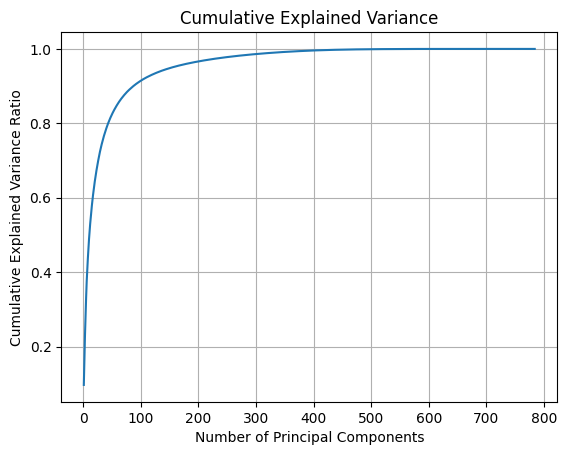

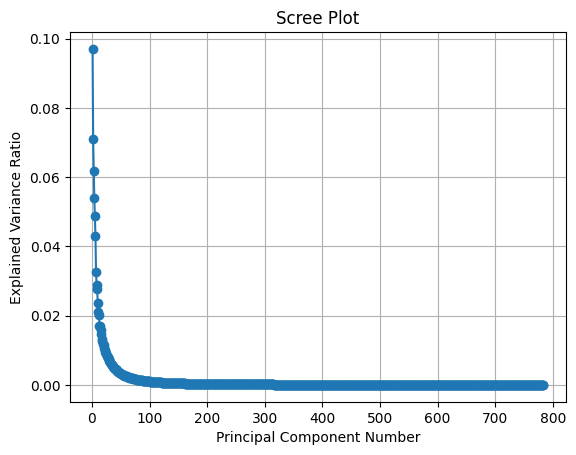

Number of features/components to retain 95.0% variance: 154
PCA Reduced data shape: (60000, 154)
Silhouette Score: 0.0793 for K 8 and Variance Coverage 95.0%


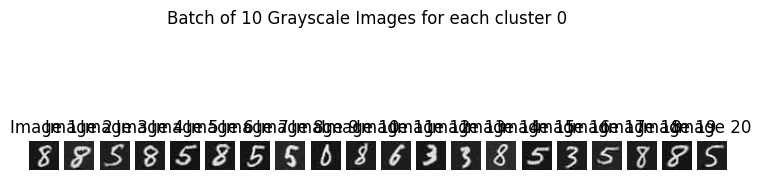

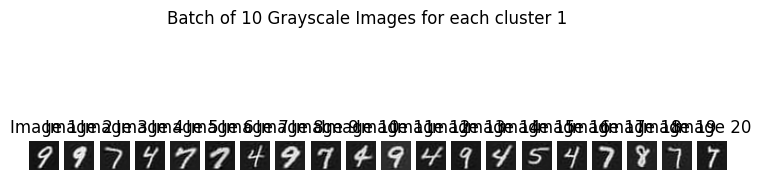

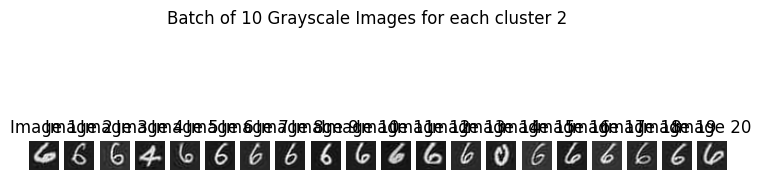

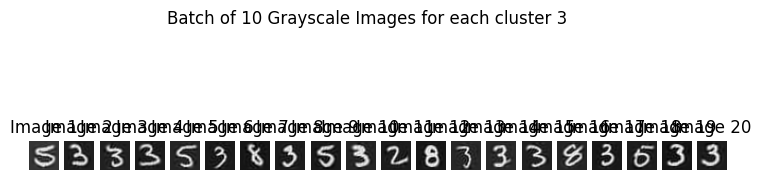

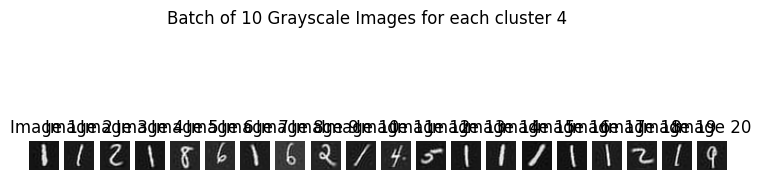

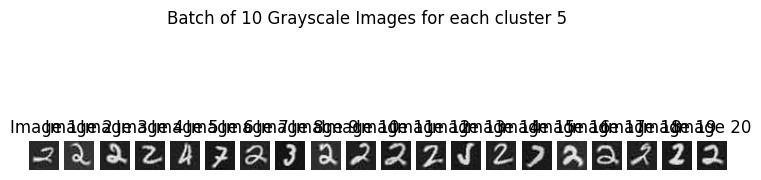

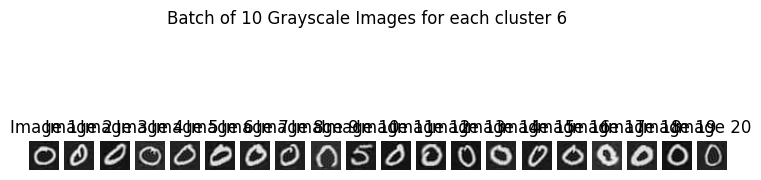

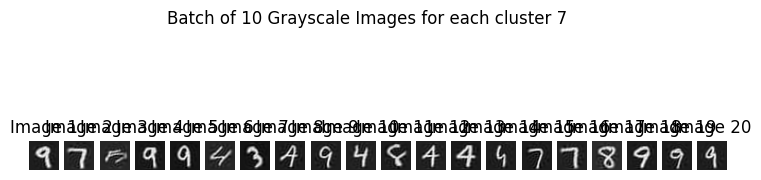

Training RandomForest classifier on reshaped full training set...
(RandomForest) Image Classifier - Train accuracy: 1.0000, Validation accuracy: 0.9323, Confidence: [0.84 1.   0.82 ... 0.67 0.99 0.98]


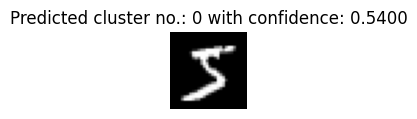

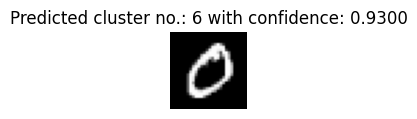

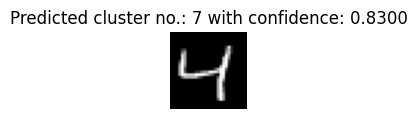

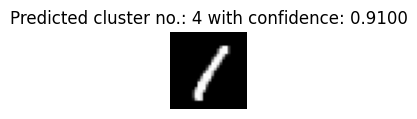

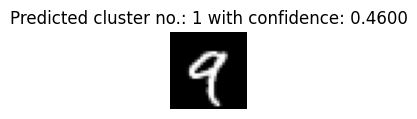

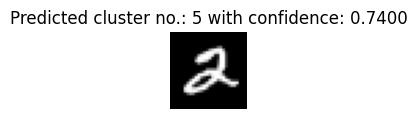

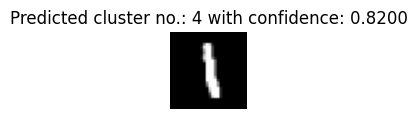

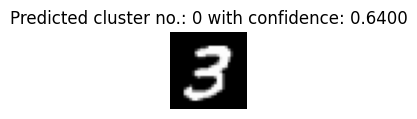

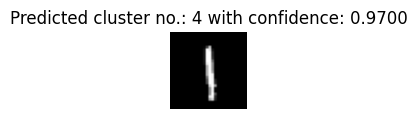

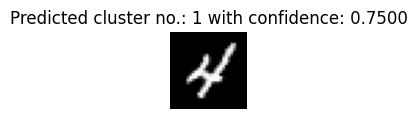

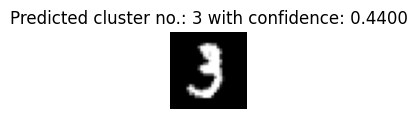

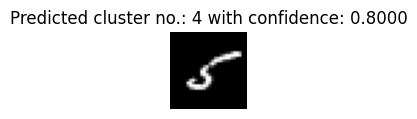

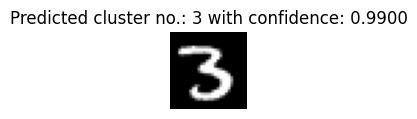

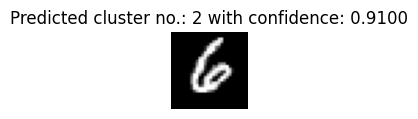

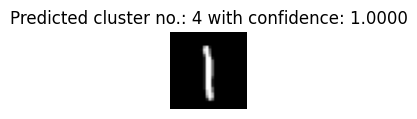

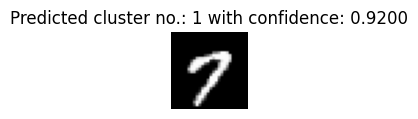

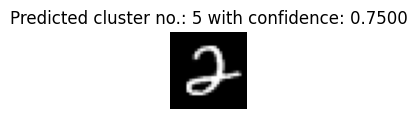

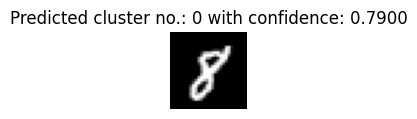

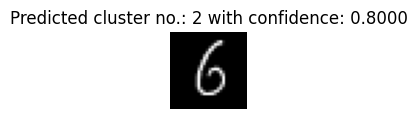

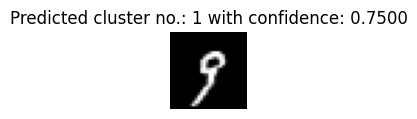

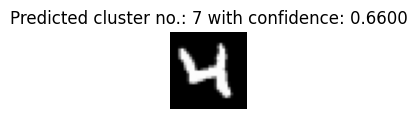

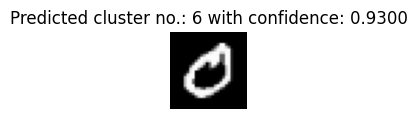

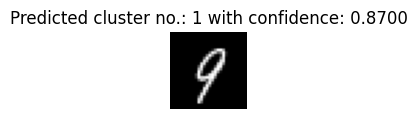

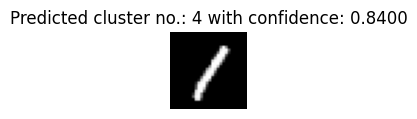

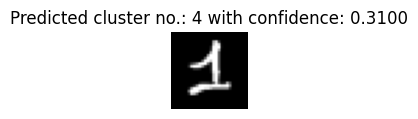

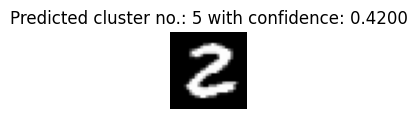

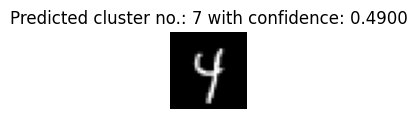

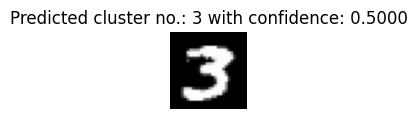

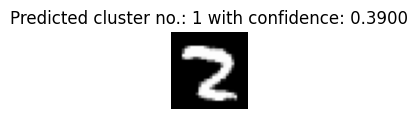

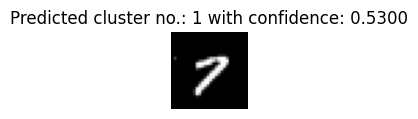

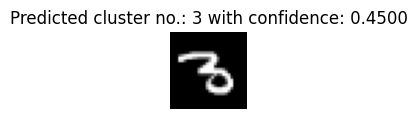

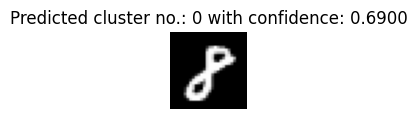

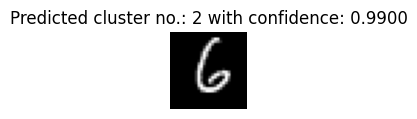

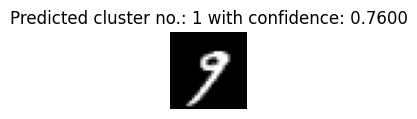

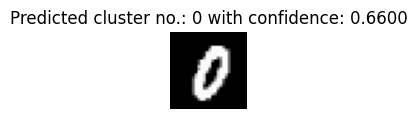

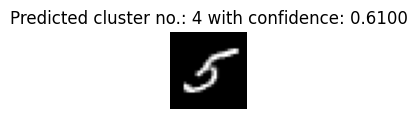

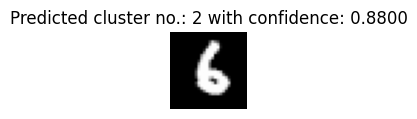

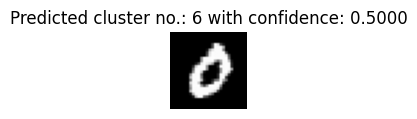

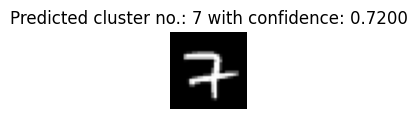

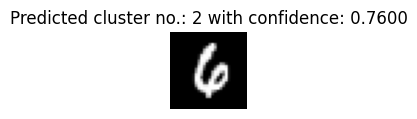

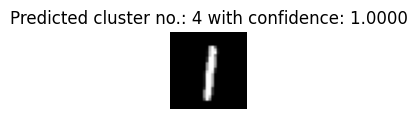

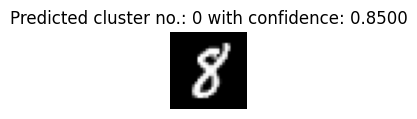

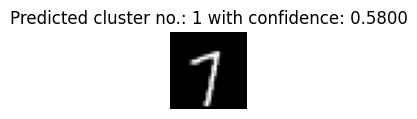

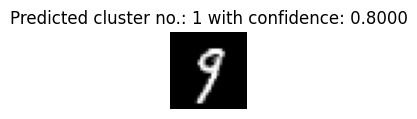

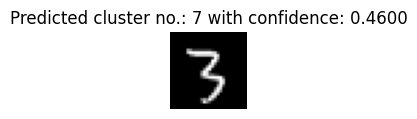

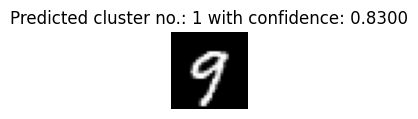

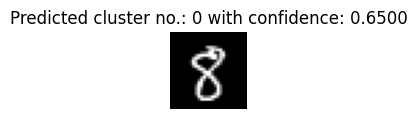

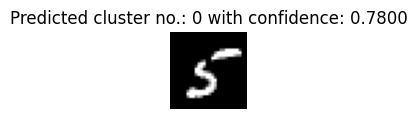

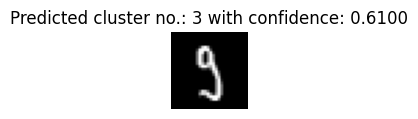

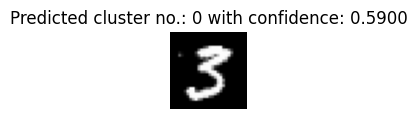

In [15]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import accuracy_score, silhouette_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import umap.umap_ as umap
import hdbscan

# Main function to put everything together
def create_labels_for_unlabeled_dataset(X_train, clusteringType):

  #X_train = np.load('/content/sample_data/unlabelled_train_data_images.npy')

  #STEP 1 - Preprocess images
  # the data shape is
  # this is a dataset of 60000 (60k) images each of size 28 pixels
  # by 28 pixels (28 x 28) with only 1 channel (meaning grayscale image)
  print(f"Original data shape: {X_train.shape}")

  # trying to reshape
  reshaped_X_train = X_train.reshape(X_train.shape[0], -1)
  print(f"Reshaped data shape: {reshaped_X_train.shape}")

  #STEP 1.1 (Optional) : Divide data set into 75%-training and 25%-testing
  # Split the data into training and testing sets
  train_data, test_data = train_test_split(reshaped_X_train, test_size=0.25, random_state=42) # random_state for reproducibility

  # JUST FOR TESTING WE ARE NOW OVER-WRITING 70% TRAIN-DATA WITH COMPLETE-FULL DATA
  # FOR TESTING ONLY, REMOVE THE BELOW LINE IF WE WANT TO USE 70% TRAIN DATA (train_data)
  train_data = reshaped_X_train

  # Normalize the dataset into [0,1] so to standardize the features values
  # remove any bias towards features having higher value when doing PCA
  train_data = train_data / 255.0

  # STEP 2: CREATE EMBEDDINGS / ENCODING
  # Initialize PCA
  pca = PCA()
  pca.fit(train_data)

  # Get the explained variance ratio
  explained_variance_ratio = pca.explained_variance_ratio_

  # Plot the cumulative explained variance ratio
  cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
  plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio)
  plt.xlabel('Number of Principal Components')
  plt.ylabel('Cumulative Explained Variance Ratio')
  plt.title('Cumulative Explained Variance')
  plt.grid(True)
  plt.show()

  plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
  plt.xlabel('Principal Component Number')
  plt.ylabel('Explained Variance Ratio')
  plt.title('Scree Plot')
  plt.grid(True)
  plt.show()

  # STEP 3: FIND OPTIMAL NUMBER OF CLUSTERS
  # Choose the number of components to retain a certain percentage of variance
  variance_coverage = 0.95
  n_components = np.argmax(cumulative_variance_ratio >= variance_coverage) + 1 # For 95% variance
  print(f"Number of features/components to retain {variance_coverage*100.0}% variance: {n_components}")

  # Re-initialize PCA with the optimal number of components
  pca_reduced = PCA(n_components=n_components)
  X_reduced = pca_reduced.fit_transform(train_data)

  print(f"PCA Reduced data shape: {X_reduced.shape}")

  # Sujit - IF Condition for clusteringType=KMEANS OR HDBSCAN
  # STEP 4: APPLY CLUSTERING AND EXTRACT LABELS
  k = 8  # For MNIST-like image data
  if clusteringType == 'KMEANS':
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, algorithm='elkan')
    labels = kmeans.fit_predict(X_reduced)

  # Calculate silhouette score to evaluate clustering quality
  silhouette_avg = silhouette_score(X_reduced, labels)
  print(f"Silhouette Score: {silhouette_avg:.4f} for K {k} and Variance Coverage {variance_coverage*100.0}%")

  # STEP 5: GATHER CLUSTERING DATA BY PCA Component
  # Create a DataFrame to store the clustering data
  clustering_data = pd.DataFrame({'PCA_Component_' + str(i+1): X_reduced[:, i] for i in range(k)})
  clustering_data['Cluster'] = labels

  # STEP 6 : ASSIGN LABELS BASED ON CLUSTER (Y_train)
  # The cluster assignments themselves can serve as the pseudo-labels.
  Y_train = labels

  # Create a DataFrame to store the assigned labels with the original data (optional but useful)
  labeled_data = pd.DataFrame(train_data)
  labeled_data['Assigned_Label'] = Y_train

  # Number of clusters for which to print the images for viewing
  n_cluster_to_print_image = k

  # STEP 7 (Optional) : VISUALIZE 20 IMAGES FROM EACH CLUSTER SO TO CHECK HOW K-MEANS CLUSTERING HAS PERFORMED
  for i in range(0,n_cluster_to_print_image):

      row = np.where(labels==i)[0]  # row in labels for elements of cluster i
      num = row.shape[0]            # number of elements for each cluster
      r = int(np.floor(num/10.))    # number of rows in the figure of the cluster

      # Only take up to 20 images from a cluster
      n_display = min(20, num)

      # Visualize 'n_display' number of images
      fig, axes = plt.subplots(1, n_display, figsize=(9, 3))
      for k in range(n_display):
          # Squeeze the image to remove the extra dimension
          image_to_display = X_reduced[row[k], :].squeeze()
          # Invert the PCA transformation to reconstruct the original image
          image = pca_reduced.inverse_transform(image_to_display) # Reconstruct the original image
          # Reshape the original image to (28,28) to get it back into image format
          image = image.reshape(28, 28)
          axes[k].imshow(image, cmap='gray')
          axes[k].set_title(f"Image {k+1}")
          axes[k].axis('off')

      plt.suptitle(f"Batch of 10 Grayscale Images for each cluster {i}")
      plt.show()

  # Return the labels, embeddings (X_reduced in this case), kmeans model, and pca model
  return Y_train, X_reduced, kmeans, pca_reduced, train_data

# Training the classifier
def train_image_classifier(features, labels, classifierName):
    """
    Train a classifier on image features and cluster-assigned labels
    """
    # Split into train and validation
    indices = np.random.permutation(len(features))
    split = int(0.8 * len(features))
    train_idx, val_idx = indices[:split], indices[split:]

    X_train, X_val = features[train_idx], features[val_idx]
    y_train, y_val = labels[train_idx], labels[val_idx]

    # Train a random forest classifier
    if classifierName == 'RandomForest':
      clf = RandomForestClassifier(n_estimators=100, random_state=42)
      clf.fit(X_train, y_train)
    elif classifierType == 'KNearestNeighbour':
      clf = KNeighborsClassifier()
      clf.fit(X_train, y_train)

    # Evaluate
    train_acc = accuracy_score(y_train, clf.predict(X_train))
    val_acc = accuracy_score(y_val, clf.predict(X_val))
    probabilities = clf.predict_proba(features)
    confidence = np.max(probabilities, axis=1)

    print(f"({classifierName}) Image Classifier - Train accuracy: {train_acc:.4f}, Validation accuracy: {val_acc:.4f}, Confidence: {confidence}")

    return clf

# Test the trained classifier
def test_image_classifier(trained_classifier, new_image_features):
    """
    Args:
        trained_classifier: The trained classifier object (e.g., RandomForestClassifier).
        new_image_features (np.ndarray): Extracted features for the new images.

    Returns:
        np.ndarray: Predicted labels for the new images.
        np.ndarray: Probabilities of each class for the new images.
        np.ndarray: Confidence scores (maximum probability) for the new predictions.
    """
    predictions = trained_classifier.predict(new_image_features)
    probabilities = trained_classifier.predict_proba(new_image_features)
    confidence = np.max(probabilities, axis=1)

    num_test_samples = new_image_features.shape[0]
    num_test_samples = 50
    for i in range(num_test_samples):
            # Reshape the image to (28, 28) before displaying
            image = new_image_features[i].reshape(28, 28)
            plt.figure(figsize=(1, 1))
            plt.imshow(image, cmap='gray')
            plt.title(f"Predicted cluster no.: {predictions[i]} with " +
                      f"confidence: {confidence[i]:.4f}")
            plt.axis('off')
            plt.show()

    return predictions, probabilities, confidence

# Example usage of the program
X_train = np.load('/content/sample_data/unlabelled_train_data_images.npy')
clusteringType='KMEANS'
Y_train, embeddings, kmeans_model, pca_model, reshaped_X_train = create_labels_for_unlabeled_dataset(X_train, clusteringType)

# Training the classifier
classifierType='RandomForest'
print(f"Training {classifierType} classifier on reshaped full training set...")
image_classifier  = train_image_classifier(reshaped_X_train, Y_train, classifierType)

X_test_data = np.load('/content/sample_data/testingimages.npy')

#STEP 1 - Preprocess testing images
# the data shape is
# this is a dataset of 60000 (60k) images each of size 28 pixels
# by 28 pixels (28 x 28) with only 1 channel (meaning grayscale image)
#print(f"Original data shape: {X_test_data.shape}")

# reshape the testing image data
reshaped_X_test = X_test_data.reshape(X_test_data.shape[0], -1)
#print(f"Reshaped testing data shape: {reshaped_X_test.shape}")
predictions, probabilities, test_confidence = test_image_classifier(image_classifier, reshaped_X_test)
#print(f"(RandomForest) Image Classifier - Test predictions: {predictions}, Test probabilities: {probabilities}, Test Confidence: {test_confidence}")

# Text Dataset

Length of text data1500
Text data: ["\nIn article <93089.204431GRV101@psuvm.psu.edu> Callec Dradja <GRV101@psuvm.psu.edu> writes:\n>I am a bit nervous about posting this beacause it is begining to\n>stray fron the topic of space but then again that doesn't seem to\n>stop alot of other people. :-)\n>\n>With all of this talk about breathing at high pressures, I began\n>to think about the movie Abyss. If you remember, in that movie one\n>of the characters dove to great depths by wearing a suit that used\n>a fluid that carries oxegen as opposed to some sort of gas. Now I\n>have heard that mice can breath this fluid but for some reason, humans\n>are unable to. Does anyone know more details about this?\n>\n>Gregson Vaux\n>\n\nI believe the reason is that the lung diaphram gets too tired to pump\nthe liquid in and out and simply stops breathing after 2-3 minutes.\nSo if your in the vehicle ready to go they better not put you on \nhold, or else!! That's about it. Remember a liquid is several m

100%|██████████| 1500/1500 [00:01<00:00, 1134.07it/s]


Clustering text...
Silhouette Score: 0.2337
Visualizing text clusters...


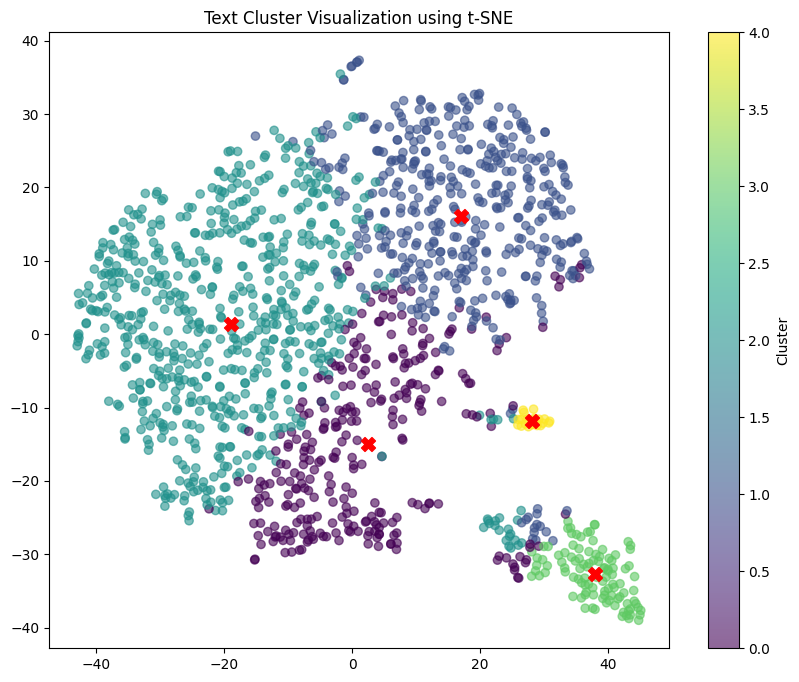

Training text classifier...
Text Classifier - Train accuracy: 1.0000, Validation accuracy: 0.9500
Training complete!
Loading new text data...
Creating embeddings for 93617 new texts...


100%|██████████| 93617/93617 [00:04<00:00, 20488.58it/s]


Predictions completed for 93617 texts
Cluster 0: 89503 texts
Cluster 1: 2386 texts
Cluster 2: 1686 texts
Cluster 3: 42 texts


In [ ]:
#!pip install numpy
#!pip install gensim
#!pip install umap-learn
#!pip install hdbscan
#!pip install tqdm

import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score, silhouette_score
from sklearn.ensemble import RandomForestClassifier
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from gensim.models import Word2Vec
import numpy as np
from tqdm import tqdm

#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('punkt_tab')

def create_text_embeddings(texts, model_path=None, vector_size=100):
    """
    Create sentence embeddings using Word2Vec (average of word vectors).
    """
    # Tokenize texts
    tokenized_texts = [word_tokenize(text.lower()) for text in texts]

    # Train or load Word2Vec model
    if model_path:
        model = Word2Vec.load(model_path)
    else:
        model = Word2Vec(sentences=tokenized_texts, vector_size=vector_size, window=5, min_count=1, workers=4)

    embeddings = []
    for tokens in tqdm(tokenized_texts):
        valid_tokens = [token for token in tokens if token in model.wv]
        if valid_tokens:
            sentence_embedding = np.mean([model.wv[token] for token in valid_tokens], axis=0)
        else:
            sentence_embedding = np.zeros(vector_size)
        embeddings.append(sentence_embedding)

    return np.array(embeddings)

def cluster_texts(features, n_clusters=5, algorithm='kmeans'):
    """
    Cluster text features
    """
    # Standardize features
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)

    # Apply clustering algorithm
    if algorithm == 'KMEANS':
        clusterer = KMeans(n_clusters=n_clusters, random_state=42)
        cluster_labels = clusterer.fit_predict(scaled_features)
        centers = clusterer.cluster_centers_
    elif algorithm == 'DBSCAN':
        clusterer = DBSCAN(eps=0.5, min_samples=5)
        cluster_labels = clusterer.fit_predict(scaled_features)
        centers = None

    # Evaluate clustering with silhouette score
    if len(np.unique(cluster_labels)) > 1:
        silhouette = silhouette_score(scaled_features, cluster_labels)
        print(f"Silhouette Score: {silhouette:.4f}")

    return cluster_labels, clusterer, scaled_features, centers

def visualize_text_clusters(features, labels, centers=None):
    """
    Visualize text clusters using PCA or t-SNE
    """
    # Reduce to 2D for visualization
    tsne = TSNE(n_components=2, random_state=42)
    reduced_features = tsne.fit_transform(features)

    # Plot
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels, cmap='viridis', alpha=0.6)

    if centers is not None:
        # Instead of using transform, we can approximate the projection of the centers
        # by finding the average position of the points in each cluster.
        centers_2d = np.array([reduced_features[labels == i].mean(axis=0) for i in range(centers.shape[0])])
        plt.scatter(centers_2d[:, 0], centers_2d[:, 1], c='red', marker='X', s=100)

    plt.colorbar(scatter, label='Cluster')
    plt.title('Text Cluster Visualization using t-SNE')
    plt.show()
    plt.close()

def train_text_classifier(features, labels):
    """
    Train a classifier on text features and cluster-assigned labels
    """
    # Split into train and validation
    indices = np.random.permutation(len(features))
    split = int(0.8 * len(features))
    train_idx, val_idx = indices[:split], indices[split:]

    X_train, X_val = features[train_idx], features[val_idx]
    y_train, y_val = labels[train_idx], labels[val_idx]

    # Train a random forest classifier
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)

    # Evaluate
    train_acc = accuracy_score(y_train, clf.predict(X_train))
    val_acc = accuracy_score(y_val, clf.predict(X_val))

    print(f"Text Classifier - Train accuracy: {train_acc:.4f}, Validation accuracy: {val_acc:.4f}")

    return clf

def analyze_prediction_results(features, predictions, n_clusters, category_type="Text"):
    """
    Analyze and visualize predictions on new data
    """
    # 1. Visualize predictions with t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    reduced_features = tsne.fit_transform(features)

    plt.figure(figsize=(12, 10))
    plt.subplot(2, 1, 1)
    scatter = plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=predictions, cmap='viridis', alpha=0.6)
    plt.colorbar(scatter, label='Predicted Cluster')
    plt.title(f't-SNE Visualization of {category_type} Predictions')

    # 2. Distribution of predictions
    plt.subplot(2, 1, 2)
    cluster_counts = np.bincount(predictions.astype(int), minlength=n_clusters)
    plt.bar(range(n_clusters), cluster_counts)
    plt.xlabel('Cluster ID')
    plt.ylabel('Count')
    plt.title(f'Distribution of {category_type} Predictions')
    plt.xticks(range(n_clusters))

    plt.tight_layout()
    plt.show()
    plt.close()

def predict_on_new_texts(text_file, text_classifier, scaler):
    """
    Apply trained text classifier to new unseen text data
    """
    print("Loading new text data...")
    with open(text_file, 'r', encoding='utf-8') as f:
        texts = [line.strip() for line in f if line.strip()]

    print(f"Creating embeddings for {len(texts)} new texts...")
    text_features = create_text_embeddings(texts)

    # Scale features using the same scaler that was used for training
    scaled_features = scaler.transform(text_features)

    # Predict using the trained classifier
    predictions = text_classifier.predict(scaled_features)
    probabilities = text_classifier.predict_proba(scaled_features)

    # Calculate confidence as the max probability
    confidence = np.max(probabilities, axis=1)

    results = []
    for i, (text, pred, conf) in enumerate(zip(texts, predictions, confidence)):
        # Truncate text for display purposes
        display_text = text[:50] + "..." if len(text) > 50 else text
        results.append({
            'text': display_text,
            'predicted_cluster': int(pred),
            'confidence': float(conf)
        })

    # Summarize results
    print(f"Predictions completed for {len(results)} texts")
    cluster_counts = np.bincount(predictions.astype(int))
    for cluster_id, count in enumerate(cluster_counts):
        print(f"Cluster {cluster_id}: {count} texts")

    return results, scaled_features, predictions

# Import and process text
X_train_text = pickle.load(open('/content/sample_data/train_data_text.pkl', 'rb'))

print(f"Length of text data{len(X_train_text)}")
print("Text data:",X_train_text,"\n")

print("Creating text embeddings...")
text_features = create_text_embeddings(X_train_text)

print("Clustering text...")
text_labels, text_clusterer, scaled_text_features, text_centers = cluster_texts(
   text_features, n_clusters=5, algorithm='KMEANS')

#print("text_labels:",text_labels)
#print("text_clusterer:",text_clusterer)
#print("scaled_text_features:",scaled_text_features)

print("Visualizing text clusters...")
visualize_text_clusters(scaled_text_features, text_labels, text_centers)

print("Training text classifier...")
text_classifier = train_text_classifier(scaled_text_features, text_labels)

# Get the scaler used for text clustering
text_scaler = StandardScaler()
text_scaler.fit(text_features)

print("Training complete!")

# Test on external data (uncomment and provide paths when needed)
# Test text classifier on new text
new_text_file = "/content/sample_data/Crime-Science-Politics.txt"

text_results, scaled_new_text_features, text_predictions = predict_on_new_texts(
     new_text_file, text_classifier, text_scaler
)
analyze_prediction_results(scaled_new_text_features, text_predictions, 5, "Text")